# STAT 207 Project 03 - Workout Analysis

Jaitin Pallath & Zach Kim

### Contribution Report

If you open this document, you should edit and complete the contribution report.  Please complete this report if you work individually, in a group and your submission is the one to be graded, or in a group but someone else should be graded.

In this contribution report below you should list of the following:
1. The netID for the project submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions to report of each team member.

*For example:*

*<u>Teammates:</u>*

*doe105 should be graded.  John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*, 

OR

*doe105 should be graded*

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

Zach Kim, zkim3
I am Jaitin Pallath, jaitinp2

# Workout Analyis and Impact on Health

## 1. Introduction

We obtained our data set from kaggle, in this link, https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset?resource=download. This data set contains a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. We have a total of 973 observations, showing key performance indicators like heart rate, calories burned, and workout duration. 

What is the relationship between Calories Burned and average BPM after controlling for age, fat percenetage, and session duration both in the sample and in the underlying population?  
Our response variable is Calories Burned.

 
 How do Resting_BPM, Calories Burned per minute, Weight, Height, and workout type relate to the log-odds of the success level of a person being male in the sample training data?  
Our response variable is the log odds of being a male.


Linear Regression(1st Question): If someone where interested in a weight loss program, then they would be interested in seeing how many calories they burned based on various fitness factors. Specifically, they may be interested in seeing how their average BPM affects how many calories they can burn in a session. Based on these predictions, they can adjust their fitness goals or training programs.

Logistic Regression(2nd Question): If a gym owner was thinking of opening an all girls yoga class, they would want to estimate how many girls they have in their gym. With a data set on the health statistics of people at their gym, they could predict how many girls are at their gym and would possibly attend the yoga class. 

In [2]:
#Imports here
import pandas as pd
import statsmodels.formula.api as smf 
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import confusion_matrix

#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
sns.set()  


In [3]:
df = pd.read_csv("gym_members_exercise_tracking.csv")

In [4]:
df["Workout_Frequency"] = df["Workout_Frequency (days/week)"]
df["Session_Duration_Minutes"] = (df["Session_Duration (hours)"] * 60)
df = df.drop(columns = ["Workout_Frequency (days/week)", "Session_Duration (hours)"])

This code above renames the title of two columns adjusting the units for the session duration(in minutes instead of hours) for ease in future code.

In [5]:
df.rename(columns={"Weight (kg)": "Weight"}, inplace=True)
df.rename(columns={"Height (m)": "Height"}, inplace=True)
df["Cals_Burned_Per_Min"] = df.Calories_Burned / df.Session_Duration_Minutes
df["Male"] = (df.Gender == "Male").astype(int)
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1000072)
df_train

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Experience_Level,BMI,Workout_Frequency,Session_Duration_Minutes,Cals_Burned_Per_Min,Male
217,43,Female,48.4,1.61,190,127,69,732.0,Cardio,34.1,2.4,1,18.67,2,76.8,9.531250,0
0,56,Male,88.3,1.71,180,157,60,1313.0,Yoga,12.6,3.5,3,30.20,4,101.4,12.948718,1
844,23,Male,116.8,1.79,178,127,69,698.0,Strength,26.8,3.4,2,36.45,4,60.0,11.633333,1
804,35,Male,62.8,1.63,184,160,63,1241.0,Cardio,21.9,3.7,2,23.64,4,84.6,14.669031,1
165,25,Female,43.1,1.62,196,161,65,837.0,HIIT,33.6,1.8,2,16.42,4,62.4,13.413462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,34,Female,74.2,1.57,178,158,52,1161.0,Cardio,32.7,2.4,1,30.10,3,88.2,13.163265,0
357,29,Male,95.2,1.86,174,141,52,496.0,Yoga,26.6,2.5,1,27.52,2,38.4,12.916667,1
278,31,Female,63.1,1.64,184,125,51,962.0,Cardio,19.0,2.7,3,23.46,4,92.4,10.411255,0
11,53,Male,51.7,1.70,175,152,72,865.0,HIIT,23.6,3.5,2,17.89,3,69.0,12.536232,1


## 2. Linear Regression Analytical Tasks

What is the relationship between Calories Burned and average BPM after controlling for age, fat percentage, and session duration both in the sample and in the underlying population?  

How does my model perform on new data?

In [6]:
reg_model = smf.ols("Calories_Burned ~ Session_Duration_Minutes + Age + Fat_Percentage + Avg_BPM", data = df_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calories_Burned   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     4645.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:20:24   Log-Likelihood:                -4218.3
No. Observations:                 778   AIC:                             8447.
Df Residuals:                     773   BIC:                             8470.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -583.9115     26.500    -22.034      0.000    -635.932    -531.891
Session_Duration_Minutes    11.1230      0.119     93.538      0.000      10.890      11.356
Age                         -3.4005      0.162    -20.980      0.000      -3.719      -3.082
Fat_Percentage              -4.7827      0.388    -12.328      0.000      -5.544      -4.021
Avg_BPM                      6.2699      0.137     45.744      0.000       6.001       6.539
==============================================================================
Omnibus:                        5.151   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                6.533
Skew:                          -0.016   Prob(JB):                       0.0381
Kurtosis:                       3.448   Cond. No.                     2.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

y_hat = -583.9115 + 11.123(Session_Duration_Minutes) - 3.4005(Age) - 4.7827(Fat_Percentage) + 6.2699(Avg_BPM)

Slope Interpretation: For every beat increase in the average beats per minute of an individual, the predicted calories burned are expected to increase by 6.2699 calories on average holding the session duration, age of the individuals, and fat percentage of the individual constant.

95% CI: I am 95% confident that the true slope for the the Avg_BPM variable is between 6.001 and 6.539

Based on this confidence interval, we can infer our model contains a fairly accurate beta for Avg_BPM of 6.2699 since that beta falls in the 95% confidence interval stated above for the Avg_BPM beta.

We assume that the individuals chosen for this gym data set were randomly chosen and that their isn't a relationship between the observations in this data. We also believe that the Age, Session_Duration_Minutes, Fat_Percentage, and Avg_BPM have a linear relationship with Calories_Burned.

Based on these assumptions, all conditions for linear regression are met.

According to our R-squared value, 96% of the variabilitiy is explained by this model in the training data. This is very high.

In [7]:
#create correlation matrix
df_x = df[["Age", "Session_Duration_Minutes", "Fat_Percentage", "Avg_BPM"]]
df_x.corr()

,Age,Session_Duration_Minutes,Fat_Percentage,Avg_BPM
Age,1.000000,-0.019912,0.002370,0.035969
Session_Duration_Minutes,-0.019912,1.000000,-0.581520,0.016014
Fat_Percentage,0.002370,-0.581520,1.000000,-0.007302
Avg_BPM,0.035969,0.016014,-0.007302,1.000000


Based on this correlation matrix, we don't see significant multicollinearity. However, fat percentage and the session duration in minutes may be slightly multicollinear. This is something to look out for.

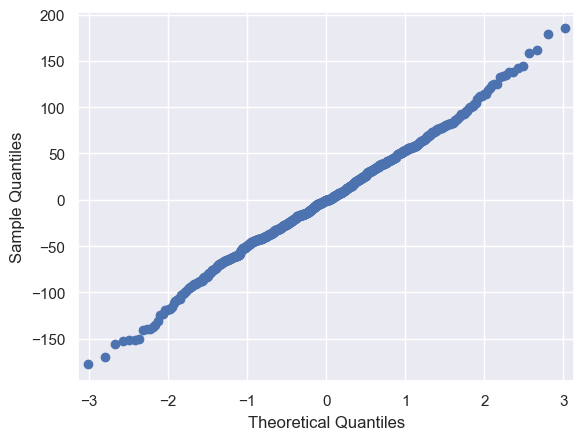

In [19]:
df_train["y_hat"] = reg_model.predict(df_train)
df_train["residuals"] = df_train.Calories_Burned - df_train.y_hat
sm.qqplot(df_train["residuals"]);


Since our qq plot is roughly a straight line, the true residuals are normally distributed.

Text(0.5, 1.0, 'Fitted values vs. Residuals Plot')

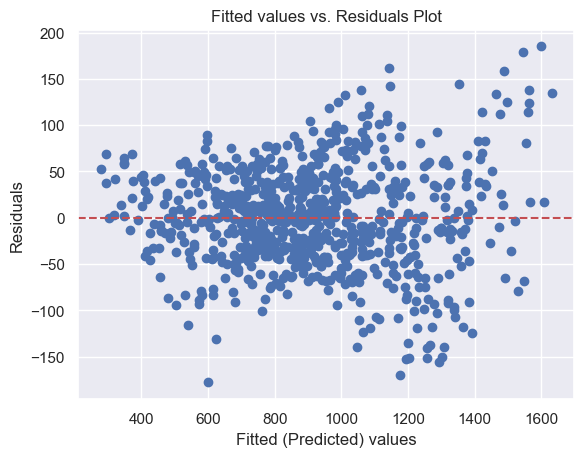

In [9]:
#checking equal variance using a fitted vs. residual plot
plt.scatter(df_train.y_hat, df_train.residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')

Since our fitted vs. residual plot has random points scattered above and below the x axis without any patterns with the different x values, we can assume there is roughly and equal variance for y at every combination of x.

Based on these numerical summaries, we can conclude all the assumptions to follow through with linear regression have been met.

In [10]:
df_test["y_hat"] = reg_model.predict(df_test)
RMSE_test = root_mean_squared_error(df_test.Calories_Burned, df_test.y_hat)
RMSE_test

np.float64(52.68396804040055)

The typical distance observed the true Calories Burned for an individual falls from the predicted Calories Burned is the RMSE of 52.684. This is not a significant error since 52 calories is less than a small snack or meal. Also, in terms of exercise, most people burn significantly more than 50 calories, typically in the hundreds.

In [11]:
df_train

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Experience_Level,BMI,Workout_Frequency,Session_Duration_Minutes,Cals_Burned_Per_Min,Male,y_hat,residuals
217,43,Female,48.4,1.61,190,127,69,732.0,Cardio,34.1,2.4,1,18.67,2,76.8,9.531250,0,757.305897,-25.305897
0,56,Male,88.3,1.71,180,157,60,1313.0,Yoga,12.6,3.5,3,30.20,4,101.4,12.948718,1,1277.651967,35.348033
844,23,Male,116.8,1.79,178,127,69,698.0,Strength,26.8,3.4,2,36.45,4,60.0,11.633333,1,673.362398,24.637602
804,35,Male,62.8,1.63,184,160,63,1241.0,Cardio,21.9,3.7,2,23.64,4,84.6,14.669031,1,1136.525779,104.474221
165,25,Female,43.1,1.62,196,161,65,837.0,HIIT,33.6,1.8,2,16.42,4,62.4,13.413462,0,873.911409,-36.911409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,34,Female,74.2,1.57,178,158,52,1161.0,Cardio,32.7,2.4,1,30.10,3,88.2,13.163265,0,1115.776169,45.223831
357,29,Male,95.2,1.86,174,141,52,496.0,Yoga,26.6,2.5,1,27.52,2,38.4,12.916667,1,501.437057,-5.437057
278,31,Female,63.1,1.64,184,125,51,962.0,Cardio,19.0,2.7,3,23.46,4,92.4,10.411255,0,1031.310323,-69.310323
11,53,Male,51.7,1.70,175,152,72,865.0,HIIT,23.6,3.5,2,17.89,3,69.0,12.536232,1,843.507512,21.492488


## 3. Logistic Regression Analytical Tasks

#### How do Resting_BPM, Calories Burned per minute, Weight, Height, and workout type relate to the log-odds of the success level of a person being male in the sample training data?


In [12]:

log_model = smf.logit("Male ~ Resting_BPM + Cals_Burned_Per_Min + Weight + Height + Workout_Type", data = df_train).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.316945
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Male   No. Observations:                  778
Model:                          Logit   Df Residuals:                      770
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.5421
Time:                        21:20:25   Log-Likelihood:                -246.58
converged:                       True   LL-Null:                       -538.53
Covariance Type:            nonrobust   LLR p-value:                7.187e-122
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -37.9999      3.076    -12.352      0.000     -44.030     -31.970
Workout_Type[T.HIIT]         0.2619      0.327      0.800      0.424      -0.380       0.904
Workout_Type[T.Strength]     0.4955      0.312      1.588      0.112      -0.116       1.107
Workout_Type[T.Yoga]         0.4908      0.322      1.523      0.128      -0.141       1.122
Resting_BPM                  0.0199      0.015      1.284      0.199      -0.010       0.050
Cals_Burned_Per_Min          0.6394      0.090      7.141      0.000       0.464       0.815
Weight                       0.0878      0.009     10.117      0.000       0.071       0.105
Height                      13.2510      1.292     10.253      0.000      10.718      15.784
============================================================================================
"""

Workout_type: All three types increase probability of the observation being a male with yoga increasing the probability the most, then strength, then HIIT, then Cardio(the baseline level since it is not included in the model).

Resting_BPM: higher values increase the probability of the observation being a male  

Cals_Burned_Per_Min: jigher values increase the probability of the observation being a male  

Weight: higher values increase the probability of the observation being a male  

Height: higher values increase the probability of the observation being a male



In [14]:
vars = df_train[["Resting_BPM", "Cals_Burned_Per_Min", "Height", "Weight"]]
vars.corr()

,Resting_BPM,Cals_Burned_Per_Min,Height,Weight
Resting_BPM,1.000000,0.040241,0.020915,-0.021624
Cals_Burned_Per_Min,0.040241,1.000000,0.192897,0.240910
Height,0.020915,0.192897,1.000000,0.369033
Weight,-0.021624,0.240910,0.369033,1.000000


This correlation matrix shows minimal multicollinearity

In [15]:
df_test["p_hat"] = log_model.predict(df_test)
df_test["y_hat"] = 1 * (df_test.p_hat > 0.5)

In [16]:
confus_matr =  pd.crosstab(df_test.Male, df_test.y_hat)
confus_matr

y_hat,0,1
Male,,
0,81,9
1,20,85


In [17]:
accuracy = (confus_matr.iloc[0, 0] + confus_matr.iloc[1, 1]) / (df_test.shape[0])
sensitivity = (confus_matr.iloc[1, 1]) / ((confus_matr.iloc[1, 1]) + (confus_matr.iloc[1, 0]))
specificity = (confus_matr.iloc[0, 0]) / ((confus_matr.iloc[0, 0]) + (confus_matr.iloc[0, 1]))
print(f"The accuracy is {accuracy}, the sensitivity is {sensitivity}, and the specificity is {specificity}")

The accuracy is 0.8512820512820513, the sensitivity is 0.8095238095238095, and the specificity is 0.9


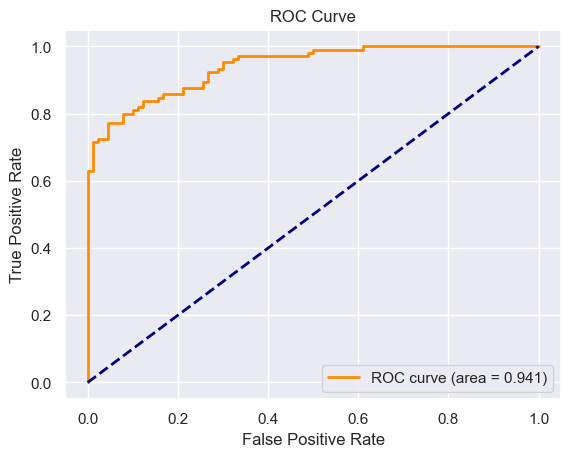

In [18]:
#ROC curve
fprs, tprs, thresholds = roc_curve(y_true = df_test.Male, y_score = df_test.p_hat)

#AUC curve
auc = roc_auc_score(y_true=df_test['Male'], 
                            y_score = df_test['p_hat'])

#function to make plot
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc(fprs, tprs, auc)

If I wanted to start a yoga class with only girls, I want to minimize the false negative rate, since false negatives are predicted observations being girls when they are actually boys. By minimizing the false negative rate, I may increase the false positive rate meaning I may reject girls that are predicted to be boys which is ok, as long as I don't have a boy in an all girls class.

We are satisfied with the performance of the classifier because the AUC(based on ROC curve) is 0.941 which is very high and close to 1, which means we perform significantly better than randomly guessing. The pseudo r^2 for our model is 0.5421, showing that our model is moderately strong in predicting the probability of an observation being male given the explanatory variables of Workout_Type, Resting_BPM, Weight, Height, and Cals_Burned_Per_Min.

Despite our pseduo r^2 not showing strong strength, we have a high AUC which is why I am satisfied. In the future, it may be beneficial to look at more explanatory variables to see their impact on the pseduo r^2.

## 4. Conclusion

Our first question was what is the relationship between Calories Burned and average BPM after controlling for age, fat percentage, and session duration both in the sample and in the underlying population?   
When looking at our gym dataset, we were very interested in predicting the calories burned for a person given their fitness/health information and workout data(session duration, workout type, etc). To do this, our explanatory variables, which were all quantitative, were Age, Average BPM, Fat Percentage, and Session Duration(in minutes) to predict calories burned. We did not want to add too many variables because this would make our linear model less parsimonious as more noise could be in the data. These specific explanatory variables yielded us a high r^2 value of 0.96 with a high adjusted r^2 value of 0.96 as well, showing the high strength and parsimoniousness of our model. When checking for assumptions, our qq plot had a straight line showing our residuals are normally distributed. Additionally, our fitted vs. residual plot had randomly scattered points for every x(no patterns or funnels), showing equal variance in the calories burned for every combination of explanatory variables. We were then able to assume all the conditions for linear regression were met.
 
Our second question was how does Resting_BPM, Calories Burned per minute, Weight, Height, and workout type relate to the log-odds of the success level of a person being male in the sample training data? 
Based on this question, we decided to predict the likelihood of an observation being a male(this is a success) given their fitness/health information and workout data(session duration, workout, etc.). To do this, our explanatory variables were the Workout Type(categorical), Resting BPM(quantitative), Height(quantitative), Weight(quantitative), and Calories Burned Per Minute(quantitative). Originally, we had calories burned and session duration, but these two variables had high multicollinearity as the calories burned for a person depends on how long they work out. In order to include both factors of session duration and calories burned without having high multicollinearity, I created the variable Cals_Burned_Per_Minute, describing the calories burned per minute(calories burned / session duration) in a workout session. Our pseudo r^2 value was moderately strong at 0.5421. This shows moderate strength of our model; however, it is not as strong as the linear model up above. Based on our ROC Curve, our AUC was 0.941, which is very high(close to 1), showing our model does a significantly better at predicting if an observation is a male compared to randomly guessing. We decided to trade off having a higher pseudo r squared or higher model strength to increase our AUC or accuracy of predicting whether each gym observation is a male.

When we were looking at calories burned and session duration, there was strong multicollinearity. We struggled with implementing both variables while reducing multicollinearity. To do this, as I explained above, we calculated the calories burned per minute for each observation. This reduces multicollinearity while still showing the effects of both variables. There may be better approaches to implementing both variables than what we did; however, we believe the calories burned per minute variable is good enough for this project. Additionally, our data set may have been taken only from one gym or one area. If a gym owner were trying to use this data set, it may not be accurate for the demographic of their gym; therefore, it would be useful to specify which gym this data set was taken from to let the audience know the true population this sample represents. Unfortunately, we do not know which area or gym this data set was taken from. 

For the future, it would be useful to look at the BMI variable to see which observations are overweight or potentially obese. Originally, we wanted to create another variable that measures obesity or being overweight(boolean variable if BMI was high enough), however our pseudo r^2 value with different explanatory variables was extremely poor. For this reason, we chose to predict the probability of an observation being male rather than obese. In the future, it would be beneifical to gather more information on these gym participants and to see if we can predict obesity. If we did this in the future, our model would need to have a higher pseudo r^2 value.